In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [3]:
df = df.drop(['date', 'id', 'yr_built', 'yr_renovated', 'lat', 'long', 'waterfront', 'sqft_living15', 'sqft_lot15'], axis=1)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,zipcode
0,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1180,0.0,98178
1,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,400.0,98125
2,180000.0,2,1.00,770,10000,1.0,0.0,3,6,770,0.0,98028
3,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1050,910.0,98136
4,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,0.0,98074


In [4]:
df[df['sqft_basement'].str.contains("\?")]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,zipcode
6,257500.0,3,2.25,1715,6819,2.0,0.0,3,7,1715,?,98003
18,189000.0,2,1.00,1200,9850,1.0,0.0,4,7,1200,?,98002
42,861990.0,5,2.75,3595,5639,2.0,0.0,3,9,3595,?,98053
79,720000.0,4,2.50,3450,39683,2.0,0.0,3,10,3450,?,98010
112,272500.0,3,1.75,1540,12600,1.0,0.0,4,7,1160,?,98038
...,...,...,...,...,...,...,...,...,...,...,...,...
21442,504600.0,5,3.00,2360,5000,1.0,0.0,3,7,1390,?,98103
21447,337500.0,4,2.50,2330,4907,2.0,0.0,3,7,2330,?,98042
21473,352500.0,2,2.50,980,1010,3.0,0.0,3,8,980,?,98117
21519,332000.0,4,2.50,2380,5737,2.0,0.0,3,7,2380,?,98023


In [5]:
df['sqft_basement'] = df['sqft_basement'].replace("\?", np.NaN, regex=True)

In [6]:
df['sqft_basement'] = df['sqft_basement'].astype(float)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   view           21534 non-null  float64
 7   condition      21597 non-null  int64  
 8   grade          21597 non-null  int64  
 9   sqft_above     21597 non-null  int64  
 10  sqft_basement  21143 non-null  float64
 11  zipcode        21597 non-null  int64  
dtypes: float64(5), int64(7)
memory usage: 2.0 MB


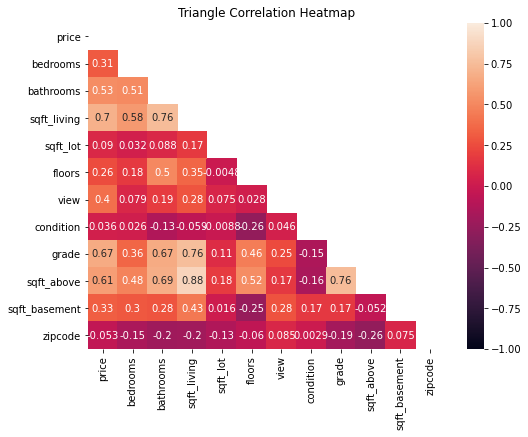

In [8]:
plt.figure(figsize=(8, 6))
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Triangle Correlation Heatmap');

In [9]:
df = df.drop('sqft_above', axis=1)

In [10]:
price_corr = df.corr()[['price']].sort_values(by='price', ascending=False)

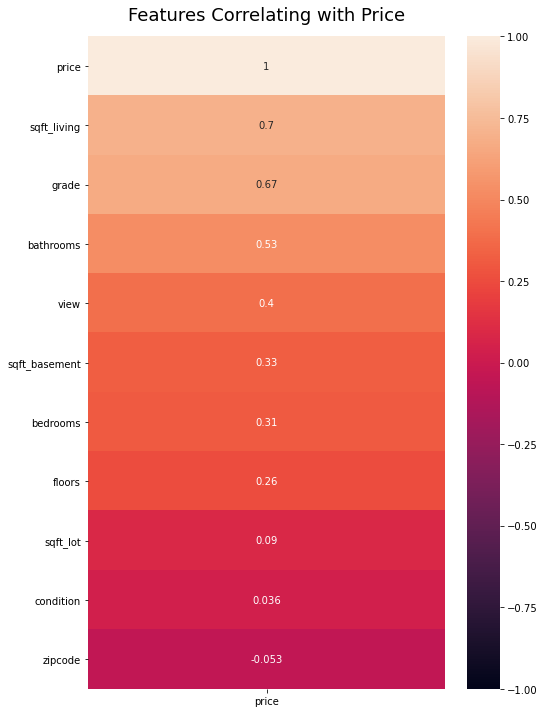

In [11]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(price_corr, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Features Correlating with Price', fontdict={'fontsize':18}, pad=16);

In [12]:
df_zip = df.groupby(df.zipcode)
df_zip_price = pd.DataFrame(df_zip.price.median())
df_zip_price.reset_index()
df_zip_price

,price
zipcode,
98001,260000.0
98002,235000.0
98003,267475.0
98004,1150000.0
98005,765475.0
...,...
98177,554000.0
98178,278277.0
98188,264000.0


In [ ]:
sns.scatterplot(df_zip_price)